<a href="https://colab.research.google.com/github/zwiebelb/Computational-Chemistry/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Baseline Corrector

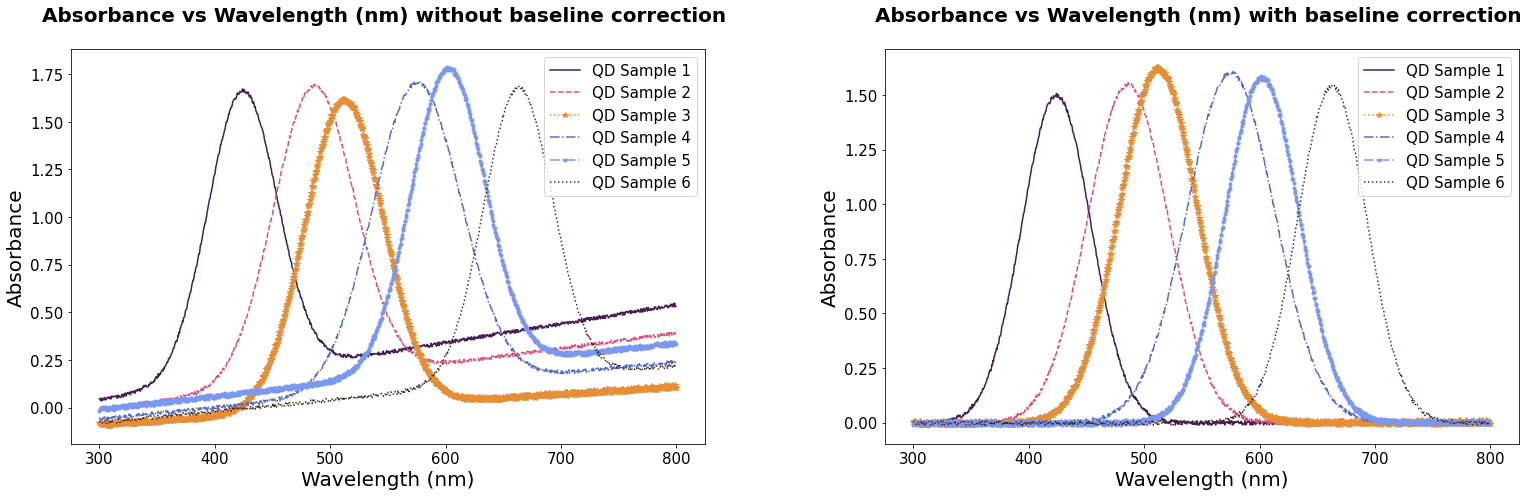

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

def main():
  # defines the file path to read in
  file_path = '/content/drive/MyDrive/Class 2022F CompMethods/Student Folders/Baila Zwiebel/Assignment 3 - NumPy Practice/Copy of QDotSpectra.txt'
  # uses numpy from txt to read the file into a data array
  data_from_txt = np.genfromtxt(file_path,delimiter = '\t')

  # lists that specify the label, color, and line style for each of the lines in the figure. 
  label_concentration = ['QD Sample 1', 'x', 'QD Sample 2','x', 'QD Sample 3','x', 'QD Sample 4', 'x','QD Sample 5', 'x','QD Sample 6']
  color_style = ['#461E52','x', '#DD517F','x', '#E68E36','x',  '#556DC8','x', '#7998EE','x', '#472C25']
  line_style = ["-", 0,"--",0, ":*",0, "-.",0, ".-.",0, ":"]
  # specifying the font sizes for the graphs
  font_size = 20
  label_font_size = 15

  # creates a 22x7 figure
  plt.figure(figsize = [22,7])
  # creates a subplot, with 2 graphs horizonatal
  plt.subplot(1,2,1)

  plt.title('Absorbance vs Wavelength (nm) without baseline correction \n',fontsize = font_size, fontweight = 'bold')

  # calls function to graph the data before the baseline correction
  before_correction(data_from_txt,color_style,label_concentration,line_style, font_size, label_font_size)

  plt.subplot(1,2,2)
  plt.title('Absorbance vs Wavelength (nm) with baseline correction \n', fontsize = font_size,fontweight = 'bold')

  # calls function to graph the data after the baseline correction
  with_correction(data_from_txt,color_style,label_concentration,line_style,font_size, label_font_size)

  # adds additional space between the two subplots
  plt.tight_layout(w_pad=5)
  plt.show()

def before_correction(data_from_txt,color_style,label_concentration,line_style,font_size, label_font_size):
  '''This function graphs the data without the baseline correction'''
  # loop that extracts the concentration and absorbance data and plots it with a specific line style, label, and color for each set of data. 
  for i in range(0,len(data_from_txt[0,:])-1, 2):
        plt.plot(data_from_txt[:,i], data_from_txt[:,i+1],line_style[i],color = color_style[i], label = label_concentration[i])
  # adds x and y labels to the graph
  plt.xlabel('Wavelength (nm)', fontsize = font_size)
  plt.ylabel('Absorbance', fontsize = font_size)
  
  # changes font size of tick labels
  plt.xticks(fontsize = label_font_size)
  plt.yticks(fontsize = label_font_size)
  # shows the legend
  plt.legend(fontsize = label_font_size)


def with_correction(data_from_txt,color_style,label_concentration,line_style, font_size, label_font_size):
  '''This function corrects the baseline and graphs the data with the correction'''
  # loop that extracts the first and last 10 data points for each x,y, finds the linear equation associated with those points, corrects the y values using the slope and y intercept, plots the corrected baseline. 
  for i in range(0,len(data_from_txt[0,:])-1, 2):
    # extracts first and last 10 x values and adds them to an array
    x = np.append(data_from_txt[0:10,i],data_from_txt[-10:,i])
    # extracts first and last 10 y values and adds them to an array
    y = np.append(data_from_txt[0:10,i+1],data_from_txt[-10:,i+1])
    # fits linear equation to data
    lin = np.polyfit(x,y,1)
    # calculates the corrected baseline by subtracting the correction ((-p*x+b)) from the y 
    new_y = (data_from_txt[:,i+1] - (lin[0]*data_from_txt[:,i] + lin[1]))
    # x values
    new_x = data_from_txt[:,i]
    # plots the corrected data
    plt.plot(new_x,new_y,line_style[i],color = color_style[i], label = label_concentration[i])
  # adds x and y labels to the graph
  plt.xlabel('Wavelength (nm)', fontsize = font_size)
  plt.ylabel('Absorbance', fontsize = font_size)
  # changes font size of tick labels
  plt.xticks(fontsize = label_font_size)
  plt.yticks(fontsize = label_font_size)
  # shows the legend
  plt.legend(fontsize = label_font_size)
    

if __name__ == "__main__":
  main()
